In [ ]:
# Insira seu project token aqui

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install imblearn --upgrade

In [ ]:
!pip install tensorflow keras 

<hr>

## Download dos conjuntos de dados em formato .csv

In [1]:
import pandas as pd

In [2]:
# Insira aqui o pandasDataFrame.
df_data_1 = pd.read_csv('data/train_dataset_algartech.csv')
# df_data_1 = pd.read_csv('training_dataset.csv')
df_data_1.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,...,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,Cliente,279,Engenharia,8,Médio completo,Ciências das natureza,1,2,3,...,80,1,10,3,3,10,7,1,7,Não
1,33,Misto,1392,Engenharia,3,Superior incompleto - cursando,Ciências das natureza,1,5,4,...,80,0,8,3,3,8,7,3,0,Não
2,27,Cliente,591,Engenharia,2,Médio completo,Medicina,1,7,1,...,80,1,6,3,3,2,2,2,2,Não
3,32,Misto,1005,Engenharia,2,Superior incompleto,Ciências das natureza,1,8,4,...,80,0,8,2,2,7,7,3,6,Não
4,59,Misto,1324,Engenharia,3,Superior completo,Medicina,1,10,3,...,80,3,12,3,2,1,0,0,0,Não


In [3]:
df_training_dataset = df_data_1
df_training_dataset.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,...,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
1365,23,Misto,638,Vendas,9,Superior completo,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Sim
1366,29,Misto,1092,Engenharia,1,Superior incompleto - cursando,Medicina,1,2027,1,...,80,3,4,3,4,2,2,2,2,Sim
1367,56,Cliente,310,Engenharia,7,Superior incompleto,Faculdade Técnica,1,2032,4,...,80,1,14,4,1,10,9,9,8,Sim
1368,50,Misto,878,Vendas,1,Superior incompleto - cursando,Ciências das natureza,1,2044,2,...,80,2,12,3,3,6,3,0,1,Sim
1369,50,Cliente,410,Vendas,28,Superior completo,Marketing,1,2055,4,...,80,1,20,3,3,3,2,2,0,Sim


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [4]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       1370 non-null   int64 
 1   Local de trabalho                           1370 non-null   object
 2   Pontuação teste                             1370 non-null   int64 
 3   Departmento                                 1370 non-null   object
 4   Distancia casa-trabalho                     1370 non-null   int64 
 5   Educacao                                    1370 non-null   object
 6   Area                                        1370 non-null   object
 7   Possui carro                                1370 non-null   int64 
 8   Subordinado                                 1370 non-null   int64 
 9   Satisfação com o ambiente no emprego atual  1370 non-null   int64 
 10  Genero                  

In [5]:
df_training_dataset.nunique()

Idade                                           43
Local de trabalho                                3
Pontuação teste                                853
Departmento                                      3
Distancia casa-trabalho                         29
Educacao                                         5
Area                                             6
Possui carro                                     1
Subordinado                                   1370
Satisfação com o ambiente no emprego atual       4
Genero                                           2
Horas voluntariado                              71
Envolvimento com trabalho                        4
Posicao                                          5
Cargo                                            9
Satisfação com emprego                           4
Estado civil                                     3
Renda                                         1269
Bonus de performance                          1329
Quantidade de empresas que trab

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [6]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [7]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Idade                                         0
Local de trabalho                             0
Pontuação teste                               0
Departmento                                   0
Distancia casa-trabalho                       0
Educacao                                      0
Area                                          0
Possui carro                                  0
Subordinado                                   0
Satisfação com o ambiente no emprego atual    0
Genero                                        0
Horas voluntariado                            0
Envolvimento com trabalho                     0
Posicao                                       0
Cargo                                         0
Satisfação com emprego                        0
Estado civil                                  0
Renda                                         0
Bonus de performance                          0
Quantidade 

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [8]:
df_training_dataset_imputed.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,...,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
1365,23,Misto,638,Vendas,9,Superior completo,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Sim
1366,29,Misto,1092,Engenharia,1,Superior incompleto - cursando,Medicina,1,2027,1,...,80,3,4,3,4,2,2,2,2,Sim
1367,56,Cliente,310,Engenharia,7,Superior incompleto,Faculdade Técnica,1,2032,4,...,80,1,14,4,1,10,9,9,8,Sim
1368,50,Misto,878,Vendas,1,Superior incompleto - cursando,Ciências das natureza,1,2044,2,...,80,2,12,3,3,6,3,0,1,Sim
1369,50,Cliente,410,Vendas,28,Superior completo,Marketing,1,2055,4,...,80,1,20,3,3,3,2,2,0,Sim


In [9]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Idade', 'Educacao', 'Area', 'Possui carro', 'Horas de trabalho padrão', 'Genero', 'Estado civil'], inplace=False)

In [10]:
df_training_dataset_rmcolumns.tail()

,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,...,Satisfação com a relação,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
1365,Misto,638,Vendas,9,2023,4,33,3,1,Vendedor junior,...,1,1,1,3,2,1,0,1,0,Sim
1366,Misto,1092,Engenharia,1,2027,1,36,3,1,Engenheiro,...,2,3,4,3,4,2,2,2,2,Sim
1367,Cliente,310,Engenharia,7,2032,4,72,3,1,Tecnico,...,4,1,14,4,1,10,9,9,8,Sim
1368,Misto,878,Vendas,1,2044,2,94,3,2,Vendedo senior,...,4,2,12,3,3,6,3,0,1,Sim
1369,Cliente,410,Vendas,28,2055,4,39,2,3,Vendedo senior,...,2,1,20,3,3,3,2,2,0,Sim


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [11]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Cargo', 'Local de trabalho', 'Departmento'])
# df_training = df_training_dataset_rmcolumns
df_training['Contratar'] = df_training['Contratar'].replace({'Sim': 1, 'Não': 0})
df_training['Necessita de hora extra'] = df_training['Necessita de hora extra'].replace({'Sim': 1, 'Não': 0})
df_training.tail()

,Pontuação teste,Distancia casa-trabalho,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Satisfação com emprego,Renda,Bonus de performance,...,Cargo_Supervisor,Cargo_Tecnico,Cargo_Vendedo senior,Cargo_Vendedor junior,Local de trabalho_Cliente,Local de trabalho_Escritório,Local de trabalho_Misto,Departmento_Engenharia,Departmento_RH,Departmento_Vendas
1365,638,9,2023,4,33,3,1,1,1790,26956,...,0,0,0,1,0,0,1,0,0,1
1366,1092,1,2027,1,36,3,1,4,4787,26124,...,0,0,0,0,0,0,1,1,0,0
1367,310,7,2032,4,72,3,1,3,2339,3666,...,0,1,0,0,1,0,0,1,0,0
1368,878,1,2044,2,94,3,2,3,6728,14255,...,0,0,1,0,0,0,1,0,0,1
1369,410,28,2055,4,39,2,3,1,10854,16586,...,0,0,1,0,1,0,0,0,0,1


# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [12]:
df_training.columns

Index(['Pontuação teste', 'Distancia casa-trabalho', 'Subordinado',
       'Satisfação com o ambiente no emprego atual', 'Horas voluntariado',
       'Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego',
       'Renda', 'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Maior de idade', 'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência', 'Contratar',
       'Cargo_Analista', 'Cargo_Assistente', 'Cargo_Diretor',
       'Cargo_Engenheiro', 'Cargo_Gerente', 'Cargo_Supervisor',
       'Cargo_Tecnico', 'Cargo_Vendedo senior', 'Cargo_Vendedor junior',
       'Local de trabalho_Cliente', 'Local de trabalho_Escritório',
       'Local de trabalho_Misto', 'Departmento_Engenharia', 'Depa

In [13]:
features = df_training[
    [
       'Pontuação teste', 'Distancia casa-trabalho', 'Subordinado',
       'Satisfação com o ambiente no emprego atual', 'Horas voluntariado',
       'Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego',
       'Renda', 'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Maior de idade', 'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência',
       'Cargo_Analista', 'Cargo_Assistente', 'Cargo_Diretor',
       'Cargo_Engenheiro', 'Cargo_Gerente', 'Cargo_Supervisor',
       'Cargo_Tecnico', 'Cargo_Vendedo senior', 'Cargo_Vendedor junior',
       'Local de trabalho_Cliente', 'Local de trabalho_Escritório',
       'Local de trabalho_Misto', 'Departmento_Engenharia', 'Departmento_RH',
       'Departmento_Vendas'
    ]
]
target = df_training['Contratar']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [14]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 


### Treinando uma árvore de decisão

In [34]:
# Método para criar um árvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import ensemble

# dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)
# dtc = RandomForestClassifier(max_depth=21).fit(X_train, y_train)
# dtc = XGBClassifier(max_depth=15).fit(X_train, y_train)
# dtc.fit(X_train,y_train)

# dtc = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1500)
# dtc.fit(X_train,y_train)

# params = {'n_estimators': 500,
#           'max_depth': 4,
#           'min_samples_split': 5,
#           'learning_rate': 0.01,
#           'loss': 'ls'}
# dtc = ensemble.GradientBoostingRegressor(**params)
# dtc.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
dtc = LogisticRegression()
dtc.fit(X_train, y_train)

# from sklearn import svm
# dtc = svm.SVC(kernel='linear', C = 1.0)
# dtc.fit(X_train, y_train)

# from sklearn.neighbors import KNeighborsClassifier  
# dtc = KNeighborsClassifier(n_neighbors = 9)  
# dtc.fit(X_train, y_train) 

# n_estimators=96, random_state=133, 

LogisticRegression()

### Fazendo previsões na amostra de teste

In [35]:
y_pred = dtc.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [36]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average=None)

array([0.93360996, 0.51515152])

### Keras

In [ ]:
from sklearn import preprocessing

#Select numerical columns which needs to be normalized
train_norm = X_train
test_norm = X_test
# Normalize Training Data 
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)
#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
X_train.update(training_norm_col)
print (X_train.head())
# Normalize Testing Data by using mean and SD of training set
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
X_test.update(testing_norm_col)
print (X_test.head())

In [ ]:
print (X_train.head())

In [ ]:
from numpy import loadtxt
import tensorflow as tf
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Flatten

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=39, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model = Sequential([
#     Flatten(input_shape=(50,)),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(16, activation=tf.nn.relu),
#     Dense(1, activation=tf.nn.sigmoid),
# ])

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
# model.fit(X_train, y_train, epochs=50, batch_size=32)
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=1500)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
np.set_printoptions(precision=4, suppress=True)
eval_results = model.evaluate(X_test, y_test, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], \
  eval_results[1]*100))

In [ ]:
# # Save the model
filepath = './saved_model'
save_model(model, filepath)

# Load the model
model = load_model(filepath, compile = True)

In [ ]:
# y_pred = dtc.predict(X_test)
# print(y_pred)
# np.set_printoptions(threshold=np.inf)
# print(X_test)
# y_pred = np.argmax(model.predict(X_test), axis = 1)
# print(y_pred.shape)

# make a prediction
y_pred = model.predict_classes(X_test)
# show the inputs and predicted outputs
print(y_pred)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average=None)

### Analisando a qualidade do modelo através da matriz de confusão

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn.neighbors import KNeighborsClassifier  
# dtc = KNeighborsClassifier(n_neighbors = 9)  
# dtc.fit(X_train, y_train) 

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

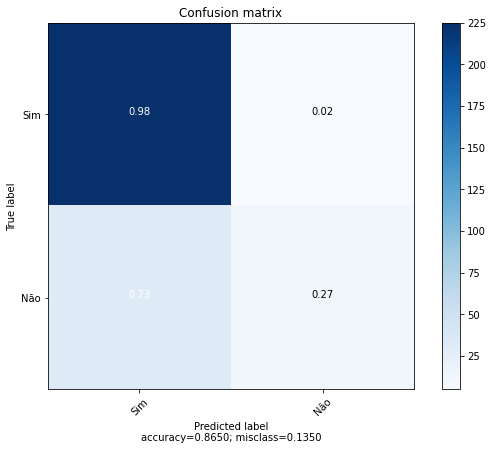

In [23]:
from sklearn.metrics import confusion_matrix

# y_test = y_test.replace({1: 'REABASTECER', 0: 'NORMAL'})
# y_pred = y_pred.replace({1: 'REABASTECER', 0: 'NORMAL'})
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['Sim', 'Não'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [ ]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

In [24]:
df_to_be_scored = pd.read_csv('data/to_be_scored_algartech.csv')
df_to_be_scored.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,...,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência
95,37,Cliente,504,Engenharia,10,Superior completo,Medicina,1,342,1,...,2,80,2,17,5,3,1,0,0,0
96,31,Misto,307,Engenharia,29,Superior incompleto,Medicina,1,355,3,...,2,80,0,6,2,4,5,4,1,4
97,28,Escritório,529,Engenharia,2,Superior incompleto - cursando,Ciências das natureza,1,364,1,...,3,80,0,5,5,1,0,0,0,0
98,47,Cliente,666,Engenharia,29,Superior incompleto - cursando,Ciências das natureza,1,376,1,...,4,80,1,10,2,2,10,7,9,9
99,44,Misto,920,Engenharia,24,Superior completo,Ciências das natureza,1,392,4,...,4,80,1,19,0,1,1,0,0,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [25]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       100 non-null    int64 
 1   Local de trabalho                           99 non-null     object
 2   Pontuação teste                             100 non-null    int64 
 3   Departmento                                 100 non-null    object
 4   Distancia casa-trabalho                     100 non-null    int64 
 5   Educacao                                    100 non-null    object
 6   Area                                        100 non-null    object
 7   Possui carro                                100 non-null    int64 
 8   Subordinado                                 100 non-null    int64 
 9   Satisfação com o ambiente no emprego atual  100 non-null    int64 
 10  Genero                     

<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [26]:
# 1 - Removendo linhas com valores NaN
# df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Local de trabalho'', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])
df_to_be_scored_1 = df_to_be_scored

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Idade', 'Educacao', 'Area', 'Possui carro', 'Horas de trabalho padrão', 'Genero', 'Estado civil'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Cargo', 'Local de trabalho', 'Departmento'])
df_to_be_scored_4 = df_to_be_scored_4.drop(columns=['Local de trabalho_0'], inplace=False)
df_to_be_scored_4['Necessita de hora extra'] = df_to_be_scored_4['Necessita de hora extra'].replace({'Sim': 1, 'Não': 0})

# df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

,Pontuação teste,Distancia casa-trabalho,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Satisfação com emprego,Renda,Bonus de performance,...,Cargo_Supervisor,Cargo_Tecnico,Cargo_Vendedo senior,Cargo_Vendedor junior,Local de trabalho_Cliente,Local de trabalho_Escritório,Local de trabalho_Misto,Departmento_Engenharia,Departmento_RH,Departmento_Vendas
95,504,10,342,1,61,3,3,3,10048,22573,...,1,0,0,0,1,0,0,1,0,0
96,307,29,355,3,71,2,1,2,3479,11652,...,0,1,0,0,0,0,1,1,0,0
97,529,2,364,1,79,3,1,3,3485,14935,...,0,1,0,0,0,1,0,1,0,0
98,666,29,376,1,88,3,3,2,11849,10268,...,0,0,0,0,1,0,0,1,0,0
99,920,24,392,4,43,3,1,3,3161,19920,...,0,1,0,0,0,0,1,1,0,0


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [27]:
df_training[
    [
       'Pontuação teste', 'Distancia casa-trabalho', 'Subordinado',
       'Satisfação com o ambiente no emprego atual', 'Horas voluntariado',
       'Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego',
       'Renda', 'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Maior de idade', 'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência',
       'Cargo_Analista', 'Cargo_Assistente', 'Cargo_Diretor',
       'Cargo_Engenheiro', 'Cargo_Gerente', 'Cargo_Supervisor',
       'Cargo_Tecnico', 'Cargo_Vendedo senior', 'Cargo_Vendedor junior',
       'Local de trabalho_Cliente', 'Local de trabalho_Escritório',
       'Local de trabalho_Misto', 'Departmento_Engenharia', 'Departmento_RH',
       'Departmento_Vendas'
    ]
].columns

Index(['Pontuação teste', 'Distancia casa-trabalho', 'Subordinado',
       'Satisfação com o ambiente no emprego atual', 'Horas voluntariado',
       'Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego',
       'Renda', 'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Maior de idade', 'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência',
       'Cargo_Analista', 'Cargo_Assistente', 'Cargo_Diretor',
       'Cargo_Engenheiro', 'Cargo_Gerente', 'Cargo_Supervisor',
       'Cargo_Tecnico', 'Cargo_Vendedo senior', 'Cargo_Vendedor junior',
       'Local de trabalho_Cliente', 'Local de trabalho_Escritório',
       'Local de trabalho_Misto', 'Departmento_Engenharia', 'Departmento_RH',


In [28]:
df_to_be_scored_4.columns

Index(['Pontuação teste', 'Distancia casa-trabalho', 'Subordinado',
       'Satisfação com o ambiente no emprego atual', 'Horas voluntariado',
       'Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego',
       'Renda', 'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Maior de idade', 'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência',
       'Cargo_Analista', 'Cargo_Assistente', 'Cargo_Diretor',
       'Cargo_Engenheiro', 'Cargo_Gerente', 'Cargo_Supervisor',
       'Cargo_Tecnico', 'Cargo_Vendedo senior', 'Cargo_Vendedor junior',
       'Local de trabalho_Cliente', 'Local de trabalho_Escritório',
       'Local de trabalho_Misto', 'Departmento_Engenharia', 'Departmento_RH',


# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [29]:
y_pred = dtc.predict(df_to_be_scored_4)
# y_pred = model.predict_classes(df_to_be_scored_4)
df_to_be_scored_4['Contratar'] = y_pred
df_to_be_scored_4['Contratar'] = df_to_be_scored_4['Contratar'].replace({1: 'Sim', 0: 'Não'})
df_to_be_scored_4.head()

,Pontuação teste,Distancia casa-trabalho,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Satisfação com emprego,Renda,Bonus de performance,...,Cargo_Tecnico,Cargo_Vendedo senior,Cargo_Vendedor junior,Local de trabalho_Cliente,Local de trabalho_Escritório,Local de trabalho_Misto,Departmento_Engenharia,Departmento_RH,Departmento_Vendas,Contratar
0,444,2,1986,2,92,3,2,2,5677,4258,...,0,1,0,0,0,1,0,0,1,Não
1,309,2,1987,3,82,3,1,2,2187,19655,...,0,0,0,0,0,1,0,1,0,Não
2,911,1,1989,4,76,3,1,2,3748,4077,...,1,0,0,0,0,1,1,0,0,Não
3,977,2,1992,4,57,3,1,3,3977,7298,...,1,0,0,0,0,1,1,0,0,Não
4,1180,25,1993,1,84,3,3,3,8633,13084,...,0,0,0,0,1,0,1,0,0,Não


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [30]:
# project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))
df_to_be_scored_4.to_csv('results.csv', index=False)

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
